# Explore here

In [ ]:
#Step 1: Prepare the environmenrt
!pip install requests pandas matplotlib seaborn sqlalchemy

In [ ]:
#Step 1: Prepare the environmenrt
!pip install --upgrade sqlalchemy

In [2]:
#Step 2: Explore the API
import requests, json, os, time
url = "https://api.worldbank.org/v2/country"
params = {
    "format": "json",
    "per_page": 50,
    "page": 1
}

response = requests.get(url, params=params)
print(response.status_code)
print(response.text)
data = response.json()
print(data)

200
[{"page":1,"pages":6,"per_page":"50","total":296},[{"id":"ABW","iso2Code":"AW","name":"Aruba","region":{"id":"LCN","iso2code":"ZJ","value":"Latin America & Caribbean "},"adminregion":{"id":"","iso2code":"","value":""},"incomeLevel":{"id":"HIC","iso2code":"XD","value":"High income"},"lendingType":{"id":"LNX","iso2code":"XX","value":"Not classified"},"capitalCity":"Oranjestad","longitude":"-70.0167","latitude":"12.5167"},{"id":"AFE","iso2Code":"ZH","name":"Africa Eastern and Southern","region":{"id":"NA","iso2code":"NA","value":"Aggregates"},"adminregion":{"id":"","iso2code":"","value":""},"incomeLevel":{"id":"NA","iso2code":"NA","value":"Aggregates"},"lendingType":{"id":"","iso2code":"","value":"Aggregates"},"capitalCity":"","longitude":"","latitude":""},{"id":"AFG","iso2Code":"AF","name":"Afghanistan","region":{"id":"MEA","iso2code":"ZQ","value":"Middle East, North Africa, Afghanistan & Pakistan"},"adminregion":{"id":"MNA","iso2code":"XQ","value":"Middle East, North Africa, Afghani

In [5]:
#Step 2: Explore the API
#try one more time tp make sure everything is OK
print(data[1][1])
print(data[1][1]["name"])

{'id': 'AFE', 'iso2Code': 'ZH', 'name': 'Africa Eastern and Southern', 'region': {'id': 'NA', 'iso2code': 'NA', 'value': 'Aggregates'}, 'adminregion': {'id': '', 'iso2code': '', 'value': ''}, 'incomeLevel': {'id': 'NA', 'iso2code': 'NA', 'value': 'Aggregates'}, 'lendingType': {'id': '', 'iso2code': '', 'value': 'Aggregates'}, 'capitalCity': '', 'longitude': '', 'latitude': ''}
Africa Eastern and Southern


In [6]:
#Step 3: Download data
#confirm the country codes exist, such as: "ESP"
url = "https://api.worldbank.org/v2/country/ESP"
params = {"format": "json"}
print(requests.get(url, params=params).json())


[{'page': 1, 'pages': 1, 'per_page': '50', 'total': 1}, [{'id': 'ESP', 'iso2Code': 'ES', 'name': 'Spain', 'region': {'id': 'ECS', 'iso2code': 'Z7', 'value': 'Europe & Central Asia'}, 'adminregion': {'id': '', 'iso2code': '', 'value': ''}, 'incomeLevel': {'id': 'HIC', 'iso2code': 'XD', 'value': 'High income'}, 'lendingType': {'id': 'LNX', 'iso2code': 'XX', 'value': 'Not classified'}, 'capitalCity': 'Madrid', 'longitude': '-3.70327', 'latitude': '40.4167'}]]


In [2]:
#Step 3: Download data
#Confirm the indicator exists
import requests

url = "https://api.worldbank.org/v2/indicator/AG.LND.ARBL.HA.PC"
params = {"format": "json"}

data = requests.get(url, params=params).json()
print(data)

[{'page': 1, 'pages': 1, 'per_page': '50', 'total': 1}, [{'id': 'AG.LND.ARBL.HA.PC', 'name': 'Arable land (hectares per person)', 'unit': '', 'source': {'id': '2', 'value': 'World Development Indicators'}, 'sourceNote': 'Arable land (hectares per person) includes land defined by the FAO as land under temporary crops (double-cropped areas are counted once), temporary meadows for mowing or for pasture, land under market or kitchen gardens, and land temporarily fallow. Land abandoned as a result of shifting cultivation is excluded.', 'sourceOrganization': 'FAO electronic files and web site, Food and Agriculture Organization of the United Nations (FAO), publisher: Food and Agriculture Organization of the United Nations (FAO)', 'topics': [{'id': '1', 'value': 'Agriculture & Rural Development  '}]}]]


In [16]:
base_url = "https://api.worldbank.org/v2"
countries = ["ESP", "CHN", "USA"]
indicator = "AG.LND.ARBL.HA.PC" 
all_data = []
for country in countries:
    print("Country:", country)

page = 1

while True:
    url_indca = f"{base_url}/country/{country}/indicator/{indicator}" #Build the url
    
    # Parameters
    params = {
        "format": "json",
        "date": "2010:2024",
        "per_page": 50,
        "page": page
        }
    response_new = requests.get(url_indca, params=params)
    data_indca = response_new.json()
    metadata_indca = data_indca[0]
    row_indca = data_indca[1]
    #print(row_indca) #check the content in row_indca

    #Save data rows (each row is one year)
    for row in row_indca:
        all_data.append(
            {"country" : country,
            "indicator" : indicator,
            "year" : row["date"],
            "value" : row["value"]
            }                
            
        )
     # Stop if last page
    if page >= metadata_indca["pages"]:
            break

    page += 1


print("\nDone.")
print("Total rows collected:", len(all_data))
print("First 5 rows:", all_data[:10])

Country: ESP
Country: CHN
Country: USA

Done.
Total rows collected: 15
First 5 rows: [{'country': 'USA', 'indicator': 'AG.LND.ARBL.HA.PC', 'year': '2024', 'value': None}, {'country': 'USA', 'indicator': 'AG.LND.ARBL.HA.PC', 'year': '2023', 'value': 0.450002141142098}, {'country': 'USA', 'indicator': 'AG.LND.ARBL.HA.PC', 'year': '2022', 'value': 0.453731634773515}, {'country': 'USA', 'indicator': 'AG.LND.ARBL.HA.PC', 'year': '2021', 'value': 0.459836405783612}, {'country': 'USA', 'indicator': 'AG.LND.ARBL.HA.PC', 'year': '2020', 'value': 0.464155417318148}, {'country': 'USA', 'indicator': 'AG.LND.ARBL.HA.PC', 'year': '2019', 'value': 0.469656306250927}, {'country': 'USA', 'indicator': 'AG.LND.ARBL.HA.PC', 'year': '2018', 'value': 0.475771312364975}, {'country': 'USA', 'indicator': 'AG.LND.ARBL.HA.PC', 'year': '2017', 'value': 0.482007612971402}, {'country': 'USA', 'indicator': 'AG.LND.ARBL.HA.PC', 'year': '2016', 'value': 0.483778024607362}, {'country': 'USA', 'indicator': 'AG.LND.ARBL.

In [19]:
# Step 4: Transform responses into DataFrames
import pandas as pd
df = pd.DataFrame(all_data)
#print(df.head())

df["year"] = pd.to_numeric(df["year"], errors="coerce").astype("Int64")
df["value"] = pd.to_numeric(df["value"], errors="coerce")

# Remove rows with null value
df = df.dropna(subset=["value", "year"])
# print(df.head())

# Create one DataFrame per indicator
tables_by_indicator = {}
for ind in df["indicator"].unique():
    t = df[df["indicator"] == ind][["country", "year", "value"]].copy()
    t = t.sort_values(["country", "year"]).reset_index(drop=True)
    tables_by_indicator[ind] = t

# View one table
first_indicator = list(tables_by_indicator.keys())[0]
print("Indicator:", first_indicator)
print(tables_by_indicator[first_indicator].head(20))


Indicator: AG.LND.ARBL.HA.PC
   country  year     value
0      USA  2010  0.509615
1      USA  2011  0.501209
2      USA  2012  0.492792
3      USA  2013  0.490700
4      USA  2014  0.488509
5      USA  2015  0.486159
6      USA  2016  0.483778
7      USA  2017  0.482008
8      USA  2018  0.475771
9      USA  2019  0.469656
10     USA  2020  0.464155
11     USA  2021  0.459836
12     USA  2022  0.453732
13     USA  2023  0.450002


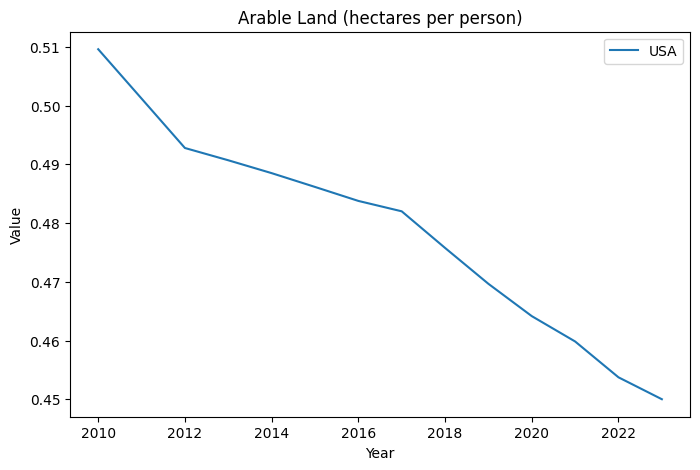

In [ ]:
#Step 5: Analysis and visualizations
import pandas as pd
import matplotlib.pyplot as plt

indicator_1 = "AG.LND.ARBL.HA.PC"

df1 = df[
    (df["indicator"] == indicator_1) &
    (df["year"] >= 2010)
]
plt.figure(figsize=(8,5))

for c in df1["country"].unique():
    country_data = df1[df1["country"] == c]
    plt.plot(country_data["year"], country_data["value"], label=c)

plt.title("Arable Land (hectares per person)")
plt.xlabel("Year")
plt.ylabel("Value")
plt.legend()
plt.show()

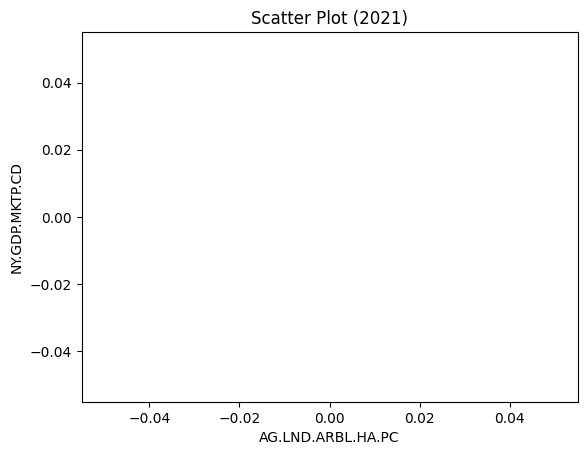

In [23]:
# Step 5: Analysis and visualizations
import matplotlib.pyplot as plt

year = 2021
df_year = df[df["year"] == year]
ind1 = "AG.LND.ARBL.HA.PC"
ind2 = "NY.GDP.MKTP.CD"

df_ind1 = df_year[df_year["indicator"] == ind1][["country", "value"]]
df_ind2 = df_year[df_year["indicator"] == ind2][["country", "value"]]
df_scatter = df_ind1.merge(
    df_ind2,
    on="country",
    suffixes=("_ind1", "_ind2")
)
plt.scatter(df_scatter["value_ind1"], df_scatter["value_ind2"])

plt.xlabel(ind1)
plt.ylabel(ind2)
plt.title(f"Scatter Plot ({year})")

plt.show()

In [28]:
# Step 6: Load results into an SQL database
import pandas as pd
from sqlalchemy import create_engine

# Create database connection
engine = create_engine("sqlite:///world_bank_analysis.db")

# Loop through each indicator
for indicator in tables_by_indicator:

    table = tables_by_indicator[indicator]

    # Clean table name (replace dots with underscores)
    table_name = "indicator_" + indicator.replace(".", "_")

    # Save to database
    table.to_sql(
        table_name,
        engine,
        if_exists="replace",   # overwrite if exists
        index=False
    )

    print("Saved:", table_name)


print("Done.")


Saved: indicator_AG_LND_ARBL_HA_PC
Done.
